In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/kaggle/input/covid-in-2023/WHO-COVID-19-global-data.csv


In [2]:
covid= pd.read_csv('/kaggle/input/covid-in-2023/WHO-COVID-19-global-data.csv')
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [3]:
covid.isnull().sum()

Date_reported           0
Country_code         1294
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

# ****Time Matrix Conversion

In [4]:
covid['Date_reported'] = covid['Date_reported'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').toordinal())

# ****Applying one hot encoding for categorical values

In [5]:
covid = pd.get_dummies(covid, columns=['Country_code', 'Country', 'WHO_region'])

In [6]:
covid.isnull().sum()

Date_reported        0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
                    ..
WHO_region_EMRO      0
WHO_region_EURO      0
WHO_region_Other     0
WHO_region_SEARO     0
WHO_region_WPRO      0
Length: 485, dtype: int64

In [7]:
covid.describe()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Country_code_,Country_code_AD,Country_code_AE,Country_code_AF,Country_code_AG,...,Country_Zambia,Country_Zimbabwe,"Country_occupied Palestinian territory, including east Jerusalem",WHO_region_AFRO,WHO_region_AMRO,WHO_region_EMRO,WHO_region_EURO,WHO_region_Other,WHO_region_SEARO,WHO_region_WPRO
count,306678.000000,3.066780e+05,3.066780e+05,306678.000000,3.066780e+05,306678.000000,306678.000000,306678.000000,306678.000000,306678.000000,...,306678.000000,306678.000000,306678.000000,306678.000000,306678.000000,306678.000000,306678.000000,306678.000000,306678.000000,306678.000000
mean,738073.500000,2.505031e+03,1.376457e+06,22.667674,1.743987e+04,0.004219,0.004219,0.004219,0.004219,0.004219,...,0.004219,0.004219,0.004219,0.210970,0.236287,0.092827,0.261603,0.004219,0.046414,0.147679
std,373.546122,4.042920e+04,6.365556e+06,344.525081,7.383136e+04,0.064820,0.064820,0.064820,0.064820,0.064820,...,0.064820,0.064820,0.064820,0.407998,0.424801,0.290190,0.439508,0.064820,0.210379,0.354782
min,737427.000000,-1.105466e+06,0.000000e+00,-120896.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,737750.000000,0.000000e+00,1.939000e+03,0.000000,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,738073.500000,1.000000e+00,3.314450e+04,0.000000,3.650000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,738397.000000,1.910000e+02,3.832040e+05,2.000000,5.635000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,738720.000000,6.966046e+06,1.034368e+08,120896.000000,1.127152e+06,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
corrr=covid.corr()
corrr

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Country_code_,Country_code_AD,Country_code_AE,Country_code_AF,Country_code_AG,...,Country_Zambia,Country_Zimbabwe,"Country_occupied Palestinian territory, including east Jerusalem",WHO_region_AFRO,WHO_region_AMRO,WHO_region_EMRO,WHO_region_EURO,WHO_region_Other,WHO_region_SEARO,WHO_region_WPRO
Date_reported,1.000000e+00,0.016259,0.180228,-0.021466,0.139642,1.667749e-12,-1.381713e-12,-1.514368e-12,-1.167481e-12,-1.602931e-12,...,-1.438567e-12,-1.642817e-12,1.836138e-12,1.562848e-13,-2.986459e-12,8.320836e-13,-2.041472e-14,1.667749e-12,6.446938e-13,2.053756e-12
New_cases,1.625932e-02,1.000000,0.196820,0.139479,0.142194,-4.032369e-03,-3.973575e-03,-2.705644e-03,-3.754794e-03,-4.021989e-03,...,-3.601529e-03,-3.702758e-03,-3.158312e-03,-3.015270e-02,2.209536e-03,-1.332088e-02,1.372412e-02,-4.032369e-03,9.790607e-03,2.085502e-02
Cumulative_cases,1.802279e-01,0.196820,1.000000,0.120406,0.823109,-1.406828e-02,-1.383198e-02,-7.810104e-03,-1.282241e-02,-1.403226e-02,...,-1.217053e-02,-1.269114e-02,-1.001056e-02,-1.030128e-01,3.323278e-02,-3.852210e-02,5.594144e-02,-1.406828e-02,6.381245e-02,5.611313e-03
New_deaths,-2.146577e-02,0.139479,0.120406,1.000000,0.161771,-4.280932e-03,-4.259614e-03,-3.939847e-03,-3.124660e-03,-4.261512e-03,...,-3.689728e-03,-3.448953e-03,-3.449391e-03,-2.995230e-02,2.930994e-02,-9.587041e-03,9.187282e-03,-4.280932e-03,2.176949e-02,-1.631590e-02
Cumulative_deaths,1.396420e-01,0.142194,0.823109,0.161771,1.000000,-1.536529e-02,-1.527559e-02,-1.398997e-02,-1.097369e-02,-1.530839e-02,...,-1.322037e-02,-1.250894e-02,-1.225395e-02,-1.067658e-01,1.171548e-01,-3.150396e-02,2.957806e-02,-1.536529e-02,8.148860e-02,-7.388326e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WHO_region_EMRO,8.320836e-13,-0.013321,-0.038522,-0.009587,-0.031504,-2.082266e-02,-2.082266e-02,2.034941e-01,2.034941e-01,-2.082266e-02,...,-2.082266e-02,-2.082266e-02,2.034941e-01,-1.654079e-01,-1.779290e-01,1.000000e+00,-1.904009e-01,-2.082266e-02,-7.057229e-02,-1.331528e-01
WHO_region_EURO,-2.041472e-14,0.013724,0.055941,0.009187,0.029578,-3.874546e-02,1.093622e-01,-3.874546e-02,-3.874546e-02,-3.874546e-02,...,-3.874546e-02,-3.874546e-02,-3.874546e-02,-3.077804e-01,-3.310789e-01,-1.904009e-01,1.000000e+00,-3.874546e-02,-1.313164e-01,-2.477623e-01
WHO_region_Other,1.667749e-12,-0.004032,-0.014068,-0.004281,-0.015365,1.000000e+00,-4.237288e-03,-4.237288e-03,-4.237288e-03,-4.237288e-03,...,-4.237288e-03,-4.237288e-03,-4.237288e-03,-3.365954e-02,-3.620752e-02,-2.082266e-02,-3.874546e-02,1.000000e+00,-1.436105e-02,-2.709582e-02
WHO_region_SEARO,6.446938e-13,0.009791,0.063812,0.021769,0.081489,-1.436105e-02,-1.436105e-02,-1.436105e-02,-1.436105e-02,-1.436105e-02,...,-1.436105e-02,-1.436105e-02,-1.436105e-02,-1.140792e-01,-1.227148e-01,-7.057229e-02,-1.313164e-01,-1.436105e-02,1.000000e+00,-9.183336e-02


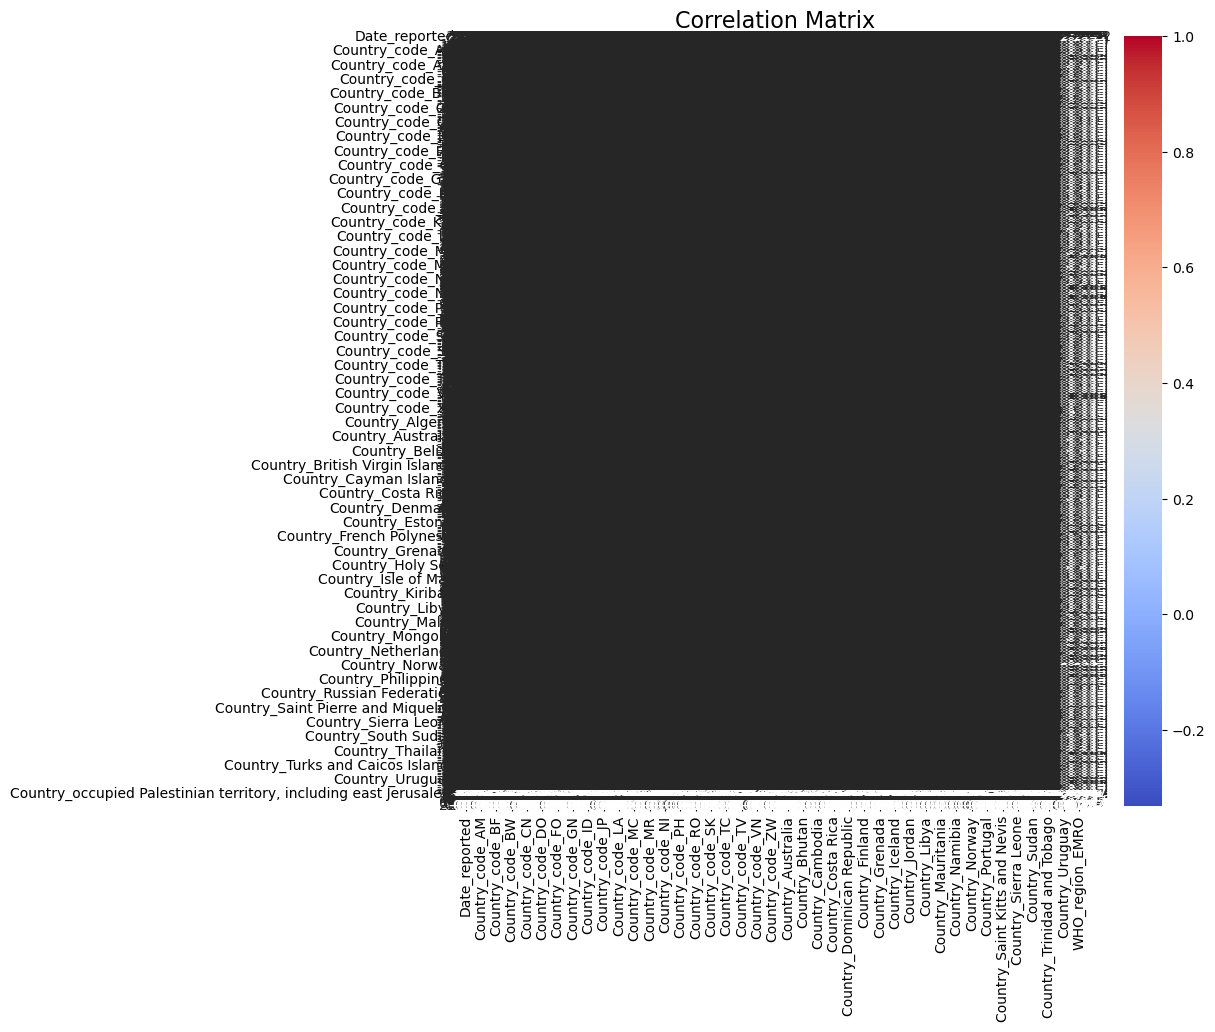

In [9]:
plt.figure(figsize=(10, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(corrr, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title and axis labels
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()


# ****EDA

# New cases

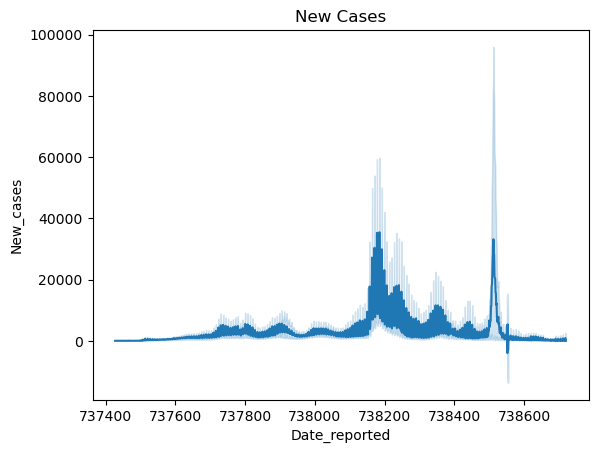

In [10]:
sns.lineplot(x='Date_reported', y='New_cases', data=covid)
plt.title('New Cases')
plt.show()

# No of deaths

In [11]:
sns.lineplot(x='Date_reported', y='New_deaths', data=df)
plt.title('Number of Deaths')
plt.show()

NameError: name 'df' is not defined

# ****Data splitting

In [ ]:
# Spliting the data into features and target
X = covid.drop('New_cases', axis=1)
y = covid['New_cases']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.title('COVID-19 Cases in 2023')
plt.show()


# ****Modelling

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)





In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10,10))
# Create a list of colors with the same length as y_test and y_pred
colors = ['red'] * len(y_test)

# Plot the actual vs predicted values
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c=colors)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# ****Prediction Assumptions

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10,10))
# Create a list of colors with the same length as y_test and y_pred
colors = ['green'] * len(y_test)

# Plot the actual vs predicted values
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c=colors)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

plt.subplot(1, 2, 1)
plt.plot(history.history['y_test'], label='Training Accuracy')
plt.plot(history.history['y_pred'], label='Validation Accuracy')
